In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons

In [ ]:
#importo datasets de test y train

df_test=pd.read_parquet('test.parquet')
df_train= pd.read_parquet('train.parquet')


In [104]:
df_test.head()

,id,region,type,sqfeet,beds,baths,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
0,7037609789,ann arbor,manufactured,1344,3,2.0,0,0,0,w/d in unit,off-street parking,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,vermont,apartment,1050,2,1.0,0,0,0,w/d hookups,off-street parking,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,ann arbor,apartment,1150,2,2.0,1,0,0,w/d in unit,carport,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,fort collins / north CO,apartment,1280,2,2.5,0,0,0,w/d in unit,attached garage,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,charlottesville,apartment,783,2,1.0,0,0,0,laundry on site,None,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [6]:
df_train.head()

,id,region,price,type,sqfeet,beds,baths,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
0,7048013474,boise,1350,house,1200,2,2.0,0,0,0,w/d in unit,detached garage,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,colorado springs,1115,apartment,694,1,1.0,0,0,0,w/d in unit,carport,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,0,w/d hookups,off-street parking,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,phoenix,1580,house,1469,3,2.0,0,0,0,w/d in unit,None,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,nashville,995,apartment,700,1,1.0,0,0,0,w/d in unit,carport,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


elimino las columnas que no pienso utilizar

In [ ]:
df_test=df_test.drop(['url','region_url','cats_allowed','dogs_allowed','image_url','smoking_allowed'],axis=1)
df_train=df_train.drop(['url','region_url','cats_allowed','dogs_allowed','image_url','smoking_allowed'],axis=1)

In [103]:
#reviso cuantos null tengo por columna
df_test.isnull().sum()

id                             0
region                         0
type                           0
sqfeet                         0
beds                           0
baths                          0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7855
parking_options            14005
description                    0
lat                          196
long                         196
state                          0
dtype: int64

utilizo scatter plot para visualizar la distribucion de mis datos

<AxesSubplot: xlabel='id', ylabel='sqfeet'>

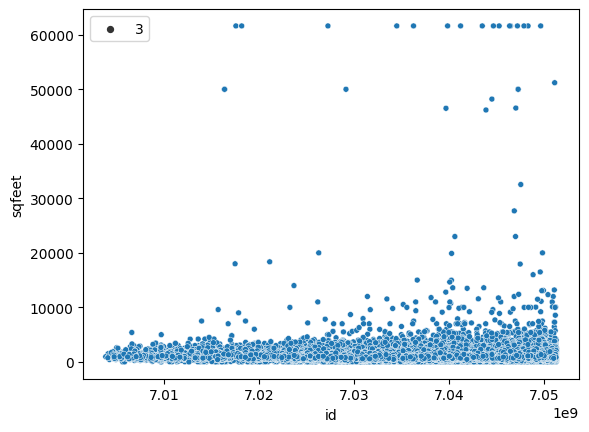

In [145]:

df_train['sqfeet']
# Aca decidimos la cantidad de bines que queremos tomar
ax = sns.scatterplot(x="id", y="sqfeet", data=df_train,size=3)
ax

en este paso se vuelven claros los outliers y los valores maximos que utilizare como limites

<AxesSubplot: xlabel='id', ylabel='sqfeet'>

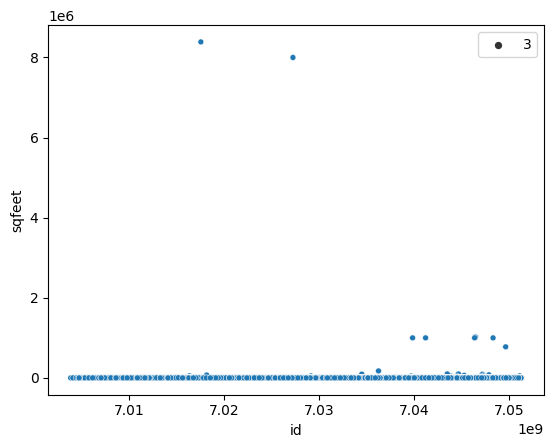

In [102]:
df_train['price']
# Aca decidimos la cantidad de bines que queremos tomar
ax = sns.scatterplot(x="id", y="sqfeet", data=df_train,size=3)
ax

In [5]:
df_tr_supervisado=df_train[['id','price','sqfeet','beds','baths','wheelchair_access','electric_vehicle_charge','comes_furnished']]

In [7]:
#uso de describe para buscar
df_train['price'].describe()

count    3.464790e+05
mean     9.664420e+03
std      4.703573e+06
min      0.000000e+00
25%      8.050000e+02
50%      1.036000e+03
75%      1.395000e+03
max      2.768307e+09
Name: price, dtype: float64

In [105]:
df_tr_supervisado.head()

,id,price,sqfeet,beds,baths,wheelchair_access,electric_vehicle_charge,comes_furnished,low_price,catg_price
0,7048013474,1350.0,1200.0,2.0,2.0,0.0,0.0,0.0,0,1
1,7043931179,1115.0,694.0,1.0,1.0,0.0,0.0,0.0,0,1
2,7048254516,1129.0,900.0,2.0,2.0,0.0,0.0,0.0,0,1
3,7041032577,1580.0,1469.0,3.0,2.0,0.0,0.0,0.0,0,1
4,7048588701,995.0,700.0,1.0,1.0,0.0,0.0,0.0,1,0


In [69]:
df_tr_supervisado['catg_price'] = np.where(df_tr_supervisado['price']>1999,2,np.where(df_tr_supervisado['price'] < 1000,0,1))
#df_tr_supervisado['catg_price'] = np.where(df_tr_supervisado['price']> 1000,1,0)
df_tr_supervisado['catg_price'].value_counts()

C:\Users\aleja\AppData\Local\Temp\ipykernel_27364\387310079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr_supervisado['catg_price'] = np.where(df_tr_supervisado['price']>1999,2,np.where(df_tr_supervisado['price'] < 1000,0,1))


0    160654
1    159804
2     26021
Name: catg_price, dtype: int64

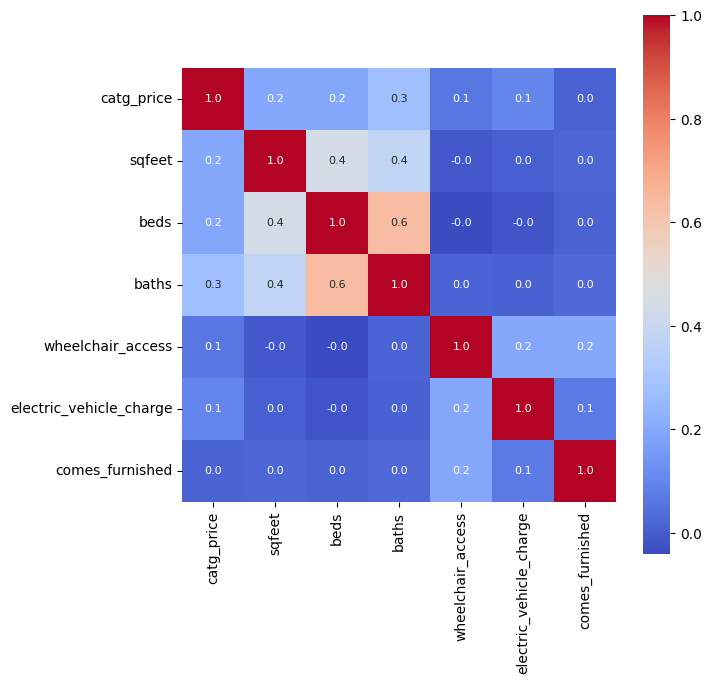

In [80]:
# Hacemos un mapa de calor
corr = dftrs.corr(method='pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 8},
           xticklabels= dftrs.columns, 
           yticklabels= dftrs.columns,
           cmap= 'coolwarm')

plt.show()

In [ ]:
# Rescalacion de valore 


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 6 features as input.

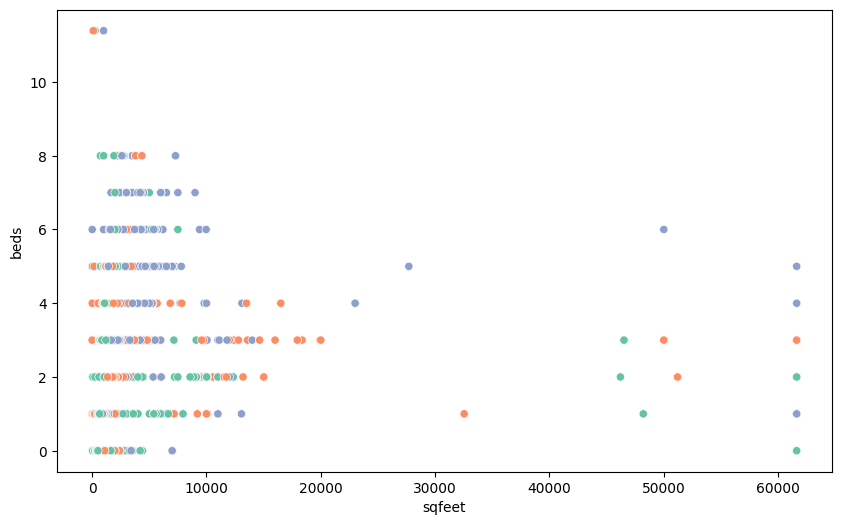

In [96]:
plt.figure(figsize= (10,6))


ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue= y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

In [94]:
X

,sqfeet,beds,baths,wheelchair_access,electric_vehicle_charge,comes_furnished
0,1200.0,2.0,2.0,0.0,0.0,0.0
1,694.0,1.0,1.0,0.0,0.0,0.0
2,900.0,2.0,2.0,0.0,0.0,0.0
3,1469.0,3.0,2.0,0.0,0.0,0.0
4,700.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
346474,660.0,1.0,1.0,0.0,0.0,0.0
346475,1099.0,2.0,2.0,0.0,0.0,0.0
346476,1104.0,2.0,2.0,0.0,0.0,0.0
346477,1050.0,2.0,2.0,0.0,0.0,0.0


In [83]:
# Exploramos algunas de las características del modelo entrenado. Para pensar, 
# ¿qúe representa cada uno de estos valores?

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0 1 2]
3
6
[0.67826363 0.10801147 0.12260439 0.01962087 0.024694   0.04680565]


In [84]:
# Predecimos

y_pred = clf.predict(X.values)

In [85]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_pred))

0.6268258682344384


In [129]:

#deficicion de upper limit en categoria precio
upper_limit = df_train['price'].mean() + 1*df_train['price'].std()

#deficicion de lower limit en categoria precio
lower_limit = df_train['price'].mean() - 1*df_train['price'].std()

#creacion de nueva columna el con outliers remplazados por uper y lowe limit respectivamente
df_train['price_sinOutlier'] = np.where(df_train['price'] > upper_limit,upper_limit,np.where(df_train['price'] < lower_limit,lower_limit,df_train['price']))

#creacion de columna de precio low usando el siguiente criterio
#propiedades low 1
#propiedades NO low 0
df_train['low_price'] = np.where(df_train['price_sinOutlier']> 999, 0, 1)
df_train['low_price'].value_counts()

0    185825
1    160654
Name: low_price, dtype: int64

In [ ]:

df_train['category_price'] = np.where(df_train['price'] < 1000 , True, False)

df.head()

In [10]:
df_ts=df_test[['region', 'type', 'sqfeet', 'beds', 'baths']]
df_tr=df_train[['region', 'type', 'sqfeet', 'beds', 'baths']]

utilice value count para decidir si habia errores en algunos dato y tambien para encontrar los casos atipicos

In [ ]:
df_tr_supervisado['baths'].value_counts()

1.0    176798
2.0    120342
1.5     24417
2.5     11651
3.0      4767
0.5      2801
4.0      1264
3.5       861
4.5       182
5.0        67
5.5        41
6.0        17
6.5         7
Name: baths, dtype: int64

In [ ]:
df_tr_supervisado['beds'].value_counts()

2    156853
1    114374
3     59593
4     10188
5      1967
6       183
7        35
8        22
Name: beds, dtype: int64

In [ ]:
df_tr_supervisado['price'].value_counts()

750     3798
800     3603
850     3583
1200    3427
950     3257
        ... 
2373       1
3207       1
4945       1
3544       1
3221       1
Name: price, Length: 3390, dtype: int64

In [ ]:
df_tr_supervisado

,id,price,sqfeet,beds,baths,wheelchair_access,electric_vehicle_charge,comes_furnished,apartment,assisted living,...,cottage/cabin,duplex,flat,house,in-law,land,loft,manufactured,townhouse,low_price
0,7048013474,1350,1200.0,2,2.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7043931179,1115,694.0,1,1.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7048254516,1129,900.0,2,2.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7041032577,1580,1469.0,3,2.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,7048588701,995,700.0,1,1.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,7050982281,672,660.0,1,1.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
346475,7049418251,2122,1099.0,2,2.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
346476,7048268235,1014,1104.0,2,2.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
346477,7026721229,935,1050.0,2,2.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train['type'].value_counts()

apartment          286303
house               29947
townhouse           14239
condo                5613
duplex               4539
manufactured         3819
cottage/cabin         770
loft                  616
flat                  470
in-law                153
land                    8
assisted living         2
Name: type, dtype: int64

creacion de listas de elementos unicos por columna

In [51]:
#funcion para crear lista de unicos uniendo los datos de test y train y eliminando los duplicados
def list_of_unique(columna):
    list_=np.concatenate((df_ts[columna].unique(),df_tr[columna].unique()))
    lista_unicos= [i for n, i in enumerate(list_) if i not in list_[:n]] 
    return lista_unicos
#for loop para crear las listas de elementos unicos que me interesan
li=['region', 'type', 'sqfeet', 'beds', 'baths']
for element in li:
    globals()['unique_%s' % element] = list_of_unique(element)
    print('unique_'+str(element))

unique_region
unique_type
unique_sqfeet
unique_beds
unique_baths


In [97]:
unique_type

NameError: name 'unique_type' is not defined

In [99]:

lista_deunicos=['unique_region','unique_type','unique_sqfeet','unique_beds','unique_baths']
for item in lista_deunicos:
    for element in item:
        print( str(element) +'  ' +str(df_tr['baths'].value_counts()[element]))



NameError: name 'df_tr' is not defined

In [12]:
col_names=df_tr.columns.values
#col_names.remove('price')
#col_names=np.delete(col_names,2)

In [86]:
list_=np.concatenate((df_ts[element].unique(),df_tr[element].unique()))
# to remove duplicates from list 
element= [i for n, i in enumerate(list_) if i not in list_[:n]] 


In [13]:
col_names

array(['region', 'type', 'sqfeet', 'beds', 'baths'], dtype=object)

In [95]:
len(element)

51

ValueError: x and y must be the same size

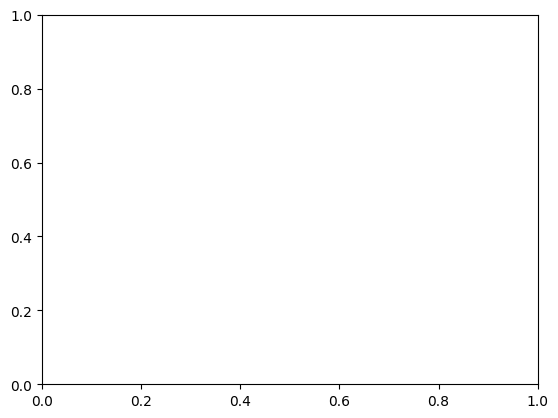

In [54]:
x=df_train['price']
y=len(x)

plt.scatter(x, y)
plt.show()

In [88]:

list_clas=np.concatenate((df_tr_supervisado['type'].unique(),df_tr_supervisado['type'].unique()))
# to remove duplicates from list 

list_clas = [i for n, i in enumerate(list_clas) if i not in list_clas[:n]] 
U=enumerate(list_clas)


KeyError: 'type'

In [65]:
list_parking1=df_tr['parking_options'].unique()
list_parking2=df_ts['parking_options'].unique()
list_parking=np.concatenate((list_parking1,list_parking2))
# to remove duplicates from list 

list_parking = [i for n, i in enumerate(list_parking) if i not in list_parking[:n]] 
list_parking

['detached garage',
 'carport',
 'off-street parking',
 None,
 'attached garage',
 'street parking',
 'no parking',
 'valet parking']

In [84]:
col_names

array(['id', 'region', 'type', 'sqfeet', 'beds', 'baths',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'description', 'lat', 'long',
       'state'], dtype=object)

In [104]:
X1= df_tr['sqfeet']
X2= df_tr['baths']
X3= df_tr['beds']

y1= df_tr['price']

In [136]:
price=dfok['price']

In [128]:
dfok=df_tr[[ 'price', 'sqfeet', 'beds', 'baths',]]

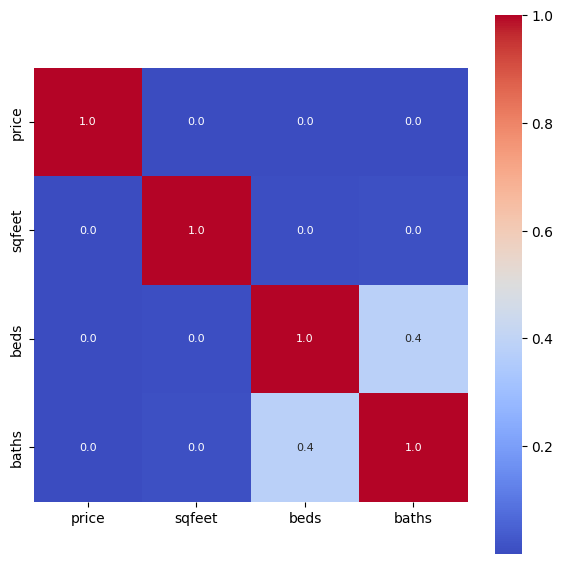

In [130]:
# Hacemos un mapa de calor

corr = dfok.corr(method='pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 8},
           xticklabels= dfok.columns, 
           yticklabels= dfok.columns,
           cmap= 'coolwarm')

plt.show()

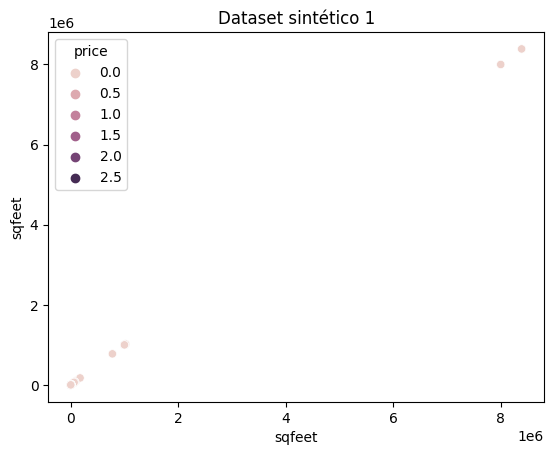

In [107]:

sns.scatterplot(x = X1 , y = X1, hue = y1)
plt.title('Dataset sintético 1')
plt.show()


In [ ]:
#uso de describe para buscar
df_tr_supervisado['price'].describe()